# Motion Prototype Generation

Example usage of motion prototype generator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from src.actprogen import effect_based_prototypes
from src.actprogen.utils import get_action_and_effect_dims

## Data Load

In [2]:
df_data = pd.read_csv("data/motion_samples.csv")
df_data = df_data[df_data['robot_in_map'] == True]
df_data = df_data.sample(n=2000,random_state=42)
# df_data = pd.read_csv("data/mujoco/Walker2d-v4_random_actions.csv")
# print(df_data.columns)
# df_data = df_data.sample(n=10000,random_state=42)

## Effect and Motion Dimensions

In [3]:
effect_dims = [['dy', 'dz']]
motion_dims = ['magnitude', 'angle']

In [9]:
# effect_dims, motion_dims = get_action_and_effect_dims(df_data)
# print(effect_dims)
# print(motion_dims)

## Prototype Generation

In [4]:
prototype_generator = effect_based_prototypes.EffectActionPrototypes(df_data, motion_dims)
prototype_generator.fixed_number_of_prototypes = 5
prototypes = prototype_generator.generate(effect_dimensions=effect_dims)

Clusters 3 score 0.47191021507357983
Clusters 4 score 0.3653204018014894
Clusters 5 score 0.36257105309634263
Clusters 6 score 0.31228895147923763
Clusters 7 score 0.35127431343148724
Clusters 8 score 0.38420197398025435
Clusters 9 score 0.3925466457546928
Clusters 10 score 0.3853232454323988
labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
No fixed protos
Label: 0 #prototypes: 1.0
Label: 1 #prototypes: 4.0
Label: 2 #prototypes: 5.0
Label: 3 #prototypes: 4.0
Label: 4 #prototypes: 1.0
Label: 5 #prototypes: 4.0


In [11]:
#np.save('airov_protos.npy', prototypes)

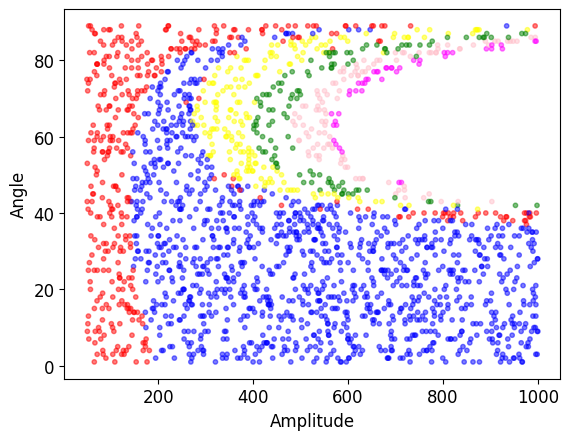

In [7]:
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

def color_picker(x):
    colors = ['blue', 'pink', 'yellow', 'green', 'red', 'magenta', 'cyan','lime','coral','salmon']
    return colors[x]

plt.scatter(df_data.magnitude, df_data.angle, 
            c=list(map(color_picker,prototype_generator.m_samples_labeled['cluster_label'])), 
            s=10, alpha=0.5)

# for i, label in enumerate(set(prototype_generator.m_samples_labeled['cluster_label'])):
#     local_ap = prototype_generator.prototypes_per_label[label]      
#     plt.scatter(local_ap.T[0], local_ap.T[1], marker="d", s=100, color='black', edgecolors='black') #colors[i]
plt.ylabel('Angle')
plt.xlabel('Amplitude')
plt.show()
#plt.savefig('rgng_only_prototypes.pdf', bbox_inches='tight')

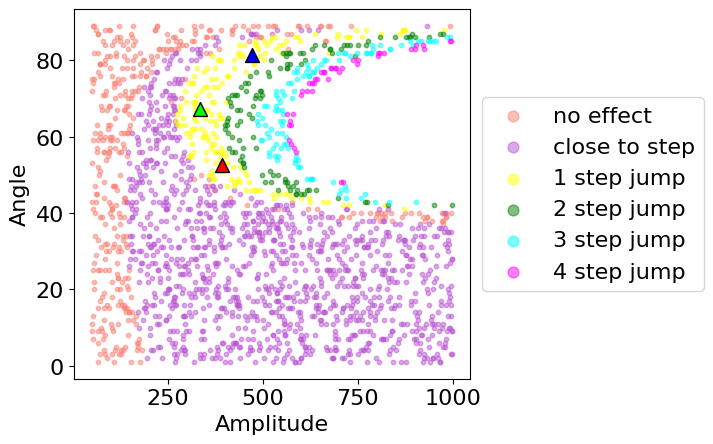

In [51]:
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

fig = plt.figure()
ax = plt.subplot(111)

def color_picker(x):
    colors = ['salmon', 'mediumorchid','green', 'yellow', 'cyan', 'magenta','lime','coral','salmon'] #, 
    return colors[x]


class_labels = [r'$\mathcal{C}_1$', r'$\mathcal{C}_2$', r'$\mathcal{C}_3$', r'$\mathcal{C}_4$', r'$\mathcal{C}_5$', r'$\mathcal{C}_6$', r'$\mathcal{C}_7$',r'$\mathcal{C}_8$',r'$\mathcal{C}_9$',r'$\mathcal{C}_{10}$']
class_labels = ['no effect', 'close to step', '1 step jump', '2 step jump','3 step jump', '4 step jump']
counter = 0
order_clusters = [0,1,3,2,4,5]
clusters = prototype_generator.m_samples_labeled['cluster_label'].unique()
for i in order_clusters:
    # print(len(prototype_generator.m_samples_labeled[prototype_generator.m_samples_labeled.cluster_label == cluster]))
    # if len(prototype_generator.m_samples_labeled[prototype_generator.m_samples_labeled.cluster_label == cluster]) < 10:
    #     continue
    temp = prototype_generator.m_samples_labeled[prototype_generator.m_samples_labeled.cluster_label == clusters[i]]
    plt.scatter(temp.magnitude, temp.angle, 
            c=color_picker(i),
            label=class_labels[counter], 
            s=10,alpha=0.5)
    counter += 1




for i, label in enumerate(set(prototype_generator.m_samples_labeled['cluster_label'])):
    if i != 2:
        continue
    local_ap = prototype_generator.prototypes_per_label[label]  
    local_ap = local_ap[2:5,:]
    cols_pro = ['red', 'blue', 'lime']
    for i,pro in enumerate(local_ap):
        plt.scatter(pro[0], pro[1], marker="^", s=100, color=cols_pro[i], edgecolors='black') #colors[i]
plt.ylabel('Angle')
plt.xlabel('Amplitude')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
lgn = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in lgn.legend_handles:
    handle.set_sizes([60])
# lgn.legend_handles[1].set_sizes([12])
plt.savefig('effect_poster.svg',bbox_inches='tight')

In [14]:
# print(prototype_generator.prototypes_per_label)
# np.save('walker-random', prototypes)

In [15]:
# prototype_generator.plot_effect_clusters_with_prototypes()

In [16]:
from src.actprogen.rgng import RobustGrowingNeuralGas
data_np = df_data[motion_dims].to_numpy()
rgng = RobustGrowingNeuralGas(
    input_data=data_np, max_number_of_nodes=10, real_num_clusters=1
)
resulting_centers = rgng.fit_network(a_max=100, passes=20)
# local_prototype = self.__pre_process.inverse_transform(resulting_centers)

In [17]:
print(resulting_centers)

[[938.83372777  31.79872737]
 [124.51466676  39.91969161]
 [816.74323582  39.89764911]
 [236.31839689  36.42371884]
 [684.72010859  28.03829985]
 [333.97591036  52.01348391]
 [553.29205528  41.36993543]
 [441.49776753  39.68983972]]


In [18]:
resulting_centers = prototypes

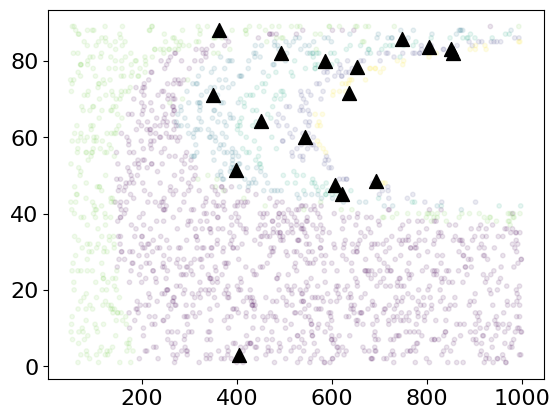

In [19]:
plt.scatter(df_data.magnitude, df_data.angle, c=prototype_generator.m_samples_labeled['cluster_label'], s=10, alpha=0.1)

    
plt.scatter(resulting_centers.T[0], resulting_centers.T[1], marker="^", s=100, color='black', edgecolors='black')
plt.show()

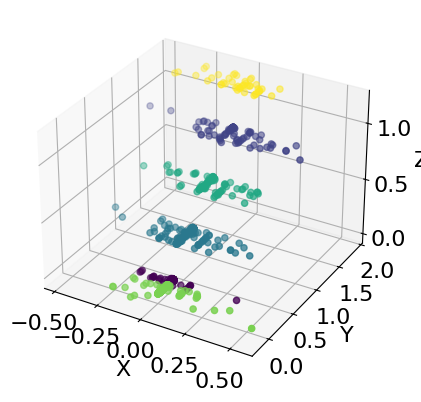

In [20]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df_data.dx, df_data.dy, df_data.dz, c=prototype_generator.m_samples_labeled['cluster_label'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()